#Proyecto Final: Clasificador de imágenes

## Autores

| Nombres | Matriculas|
|---|---|
| Franchesca Fermin | 20-0083|
| Geraldo Martinez | 20-0099|
| Raymundo Ramirez | 20-0258|
| Rafael Apkarian | 20-0015|
| Esteban German | 20-0703|

En este proyecto estaremos clasificando imagenes del conjunto de datos Fashion_mnist. Este conjunto de datos consiste en fotos de prendas de ropa que han sido ya provistas en escalas de grises para un mejor procesamiento de la data.

>El proyecto consiste en las siguientes partes:
- Ingesta de datos
- Análisis exploratorio
- Preprocesamiento
- Clasificador base
- Experimentación
- Regularización y red final


Luego de finalizar con la clasificación, se hara un análisis final concluyendo nuestro proyecto.

#Ingesta de datos

Para simplificar nuestro trabajo en la ingesta de datos, se utiliza la API de Tensorflow, en particular, el submodulo de `fashion_mnist` del módulo `keras.datasets` para descargar e importar el conjunto de datos de Fashion-MNIST, donde cada imagen vendrá representada como una matriz de NumPy.

In [ ]:
#Importar modulo correspondiente.
from tensorflow.keras.datasets import fashion_mnist

Luego, cargamos los datos llamando la funcion `load_data()` para generar una tupla de NumPy conteniente de los conjuntos de imagenes y etiquetas de entrenamiento y prueba respectivamente.

In [ ]:
# Cargar los datos de Fashion-MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


#Análisis exploratorio

Luego de cargar los datos, podemos obtener una idea del tamaño de los arreglos de imagenes y etiquetas. Vemos que el conjunto de datos de entrenamiento cuenta con 60,000 imagenes de 28x28 píxeles, mientras que el conjunto de datos de prueba tiene 10,000 imagenes de tambien 28x28 píxeles.

In [ ]:
# Imprimiendo el tamaño de los arreglos de los datos cargados
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


1- ¿Cuántas imágenes hay de entrenamiento y de prueba?

In [ ]:
print('Número de imágenes de entrenamiento:', x_train.shape[0])
print('Número de imágenes de prueba:', x_test.shape[0])

Número de imágenes de entrenamiento: 60000
Número de imágenes de prueba: 10000


2- ¿Qué tamaño tienen las imágenes?

In [ ]:
print('Tamaño de una imagen del conjunto de entrenamiento:', x_train[0].shape, 'píxeles')

Tamaño de una imagen del conjunto de entrenamiento: (28, 28) píxeles


3- Presente al menos una instancia del conjunto de datos y describa a partir de esto qué información se guarda en cada imagen. 

In [ ]:
print('Matriz de datos Vestido:')
print(x_train[10])


Matriz de datos Vestido:
[[  0   0   0   0   0   0   0  11 142 200 106   0   0   0   0   0   0   0
   85 185 112   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 152 214 217 194 236 216 187 149 135 153 211 217
  231 205 217 188  34   0   0   0   0   0]
 [  0   0   0   0   0  66 185 166 180 181 190 211 221 197 146 198 206 191
  168 190 172 188 175   0   0   0   0   0]
 [  0   0   0   0   0 135 153 160 175 180 170 186 187 190 188 190 187 174
  195 185 174 161 175  59   0   0   0   0]
 [  0   0   0   0   0 161 147 160 170 178 177 180 168 173 174 171 185 184
  185 172 171 164 174 120   0   0   0   0]
 [  0   0   0   0   2 175 146 145 168 178 181 185 180 184 178 179 187 191
  193 190 181 171 172 158   0   0   0   0]
 [  0   0   0   0  35 177 155 140 151 172 191 187 186 187 186 187 182 191
  194 188 180 161 161 185   0   0   0   0]
 [  0   0   0   0  59 170 153 141 120 154 160 161 172 168 166 161 165 172
  170 164 139 149 162 166  21   0   0   0]
 [  0   0   0   0  79 145 160 214 123 1

In [ ]:
print('Matriz de datos Bolso:')
print(x_train[23])

Matriz de datos Bolso:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   1   0   1   0   3   1   0   1   0
    1   0   1   0   0   0   0   0   0   0]
 [  0   0  45  40  52   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [ 10  96 174 128 126 114  84 100 114  77  98  77  77  93  86  84  87 107
   91  94  87  87  86  91  96 103 123  26]
 [ 87 144  42 103 175 167  66 117 112 133 114 121 140 131 110 149 131 110
  137 128 112 105 167 186 138  98 135  63]
 [ 61 140  94 156 160 145 128  65  91 205 133 165 163  75  98 160 168 140
  181 124  93 131 184 181 124 119 196  38]
 [100 168 170 126 161 177 191  63 116 170

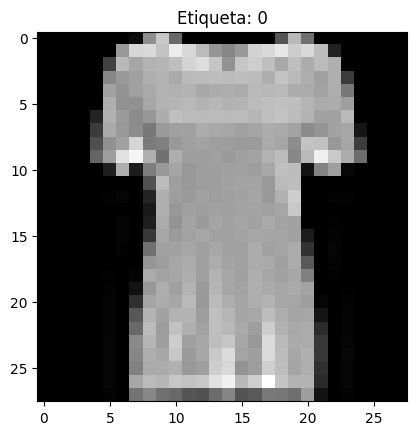

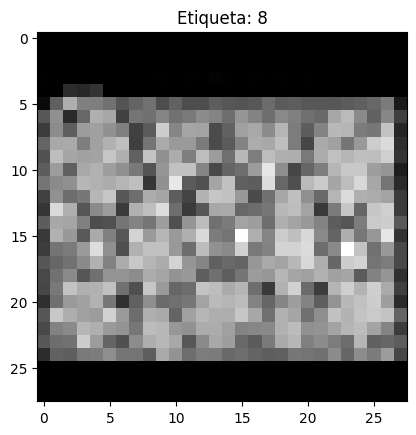

In [ ]:
import matplotlib.pyplot as plt
# Mostrando instancias del conjunto de datos

# Instancia 1
plt.imshow(x_train[10], cmap='gray')
plt.title('Etiqueta: ' + str(y_train[10]))
plt.show()


# Instancia 2
plt.imshow(x_train[23], cmap='gray')
plt.title('Etiqueta: ' + str(y_train[23]))
plt.show()


El conjunto de datos 'Fashion_mnist' contienen imagenes en escala de grises de ropa de vestir. En esta imagen se puede observar que los objetos seleccionados son:

-Vestido

-Bolso

4- Describa qué contiene la información en y

La variable **y** en el conjunto de datos contiene las etiquetas que corresponden a cada imagen en x.

Cada etiqueta es un número entero que indica la clase de ropa que se representa en la imagen. Ademas, las etiquetas son números enteros entre 0 y 9, donde cada número entero representa una clase de prenda de vestir específica, como se muestra a continuación:

0: T-shirt

1: Pantalón

2: Suéter

3: Vestido

4: Abrigo

5: Sandalia

6: Blusa

7: Tenis

8: Bolso

9: Bota


5- Muestre como imagen una instancia de cada clase

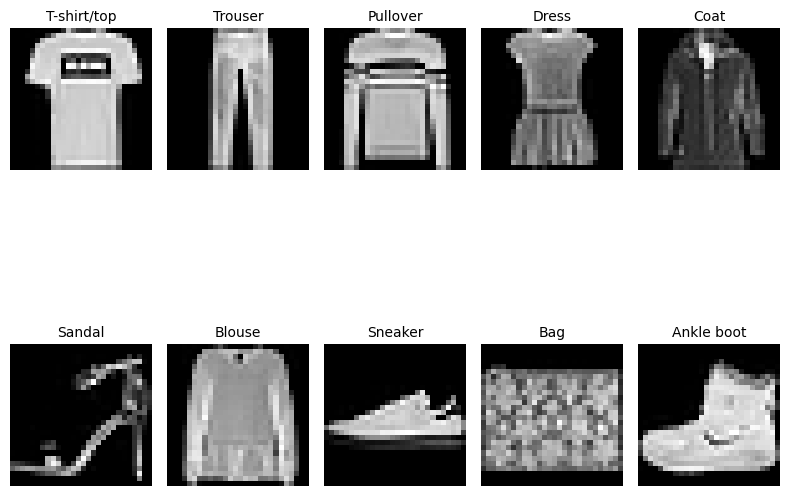

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Definir las etiquetas de las clases
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Blouse', 'Sneaker', 'Bag', 'Ankle boot']

# Crear una figura para mostrar las imágenes
fig = plt.figure(figsize=(8, 8))

# Mostrar una imagen aleatoria de cada clase
for i in range(10):
    idx = np.where(y_train == i)[0][0]
    
    # Obtener la imagen correspondiente y mostrarla
    ax = fig.add_subplot(2, 5, i+1)
    ax.imshow(x_train[idx], cmap='gray')
    ax.set_title(class_names[i], fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()

#Preprocesamiento

Las imagenes de entrada son normalizadas, dividiendo los valores de pixeles por 255.0, para que esten en un rango de 0 a 1:

In [ ]:
# Escalando las imágenes de entrenamiento
x_train = x_train.astype('float32') / 255.0

# Escalando las imágenes de prueba
x_test = x_test.astype('float32') / 255.0

# Clasificador base
## Construcción del modelo

Primero, definimos el modelo de red neuronal utilizando la clase `Sequential` de Keras.

Para procesar las imagenes con una red neurnonal, es necesario transformar cada imagen en un vector unidimensional, donde cada pixel sea representado como una unica entrada.

Este modelo consta de una capa de entrada `Flatten` que convierte la matriz de 28x28 píxeles en un vector de 784 dimensiones, una capa oculta `Dense` con 128 unidades y un activador tipo sigmoide, y una capa de salida `Dense` con 10 unidades y un activador de tipo softmax:

In [ ]:
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation = 'sigmoid'),
    keras.layers.Dense(10, activation = 'softmax')
])

## Entrenamiento del modelo
Luego, compilamos el modelo utilizando el optimizador `Adam`.

Tambien utilizamos la funcion de perdida `sparse_categorical_crossentropy`, dado que es utilizado cuando las etiquetas de salida son codificadas como vectores unidimensionales en lugar de vectores one-hot. Tambien se utiliza una metrica de `accuracy` para medir el rendimiento del modelo durante el entrenamiento.

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Evaluación del modelo

Luego de haber compilado nuestro modelo, podemos pasar a entrenar y evaluar el modelo luego de haberlo ajustado con los datos de entrenamiento. Este entrenamiento durara 10 épocas y utilizara un tamaño de lote de 64.

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
938/938 [==============================] - 4s 3ms/step - loss: 0.5880 - accuracy: 0.8051
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.4101 - accuracy: 0.8545
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3715 - accuracy: 0.8656
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3470 - accuracy: 0.8747
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3284 - accuracy: 0.8818
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3147 - accuracy: 0.8856
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3023 - accuracy: 0.8906
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2925 - accuracy: 0.8929
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2812 - accuracy: 0.8960
Epoch 10/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2734 - accuracy: 0.8997

## Predicciones
Para las predicciones, primero utilizamos el método `predict()` del modelo para hacer predicciones en el conjunto de prueba de `x_test` y guardamos las predicciones dentro de una variable llamada `classifications`.

In [ ]:
# Obtener las predicciones del modelo
classifications = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


Luego, imprimimos la primera entrada de `classifications` utilizando un indice de `[0]`. El vector de numeros impreso representa las probabilidades de que la imagen pertenezca a la clase correspondiente.

In [ ]:
# Imprimír primera predicción
print(classifications[0])

[1.4593441e-05 4.3661385e-07 2.0550298e-05 1.3075365e-05 1.5164347e-05
 4.3335181e-02 5.5947981e-05 3.1410407e-02 3.4151881e-04 9.2479312e-01]


Para obtener la clase predicha por el modelo, podemos utilizar la funcion `argmax()` de NumPy para devolver el índice del valor máximo en un arreglo de NumPy. En este caso, el índice del valor máximo en la predicción corresponderá a la clase predicha.

De esta manera, vemos que la clase predicha por el modelo para la primera imagen es la de "Ankle boot".

In [ ]:
# Utilizar la funcion argmax() para obtener la clase predicha
predicted_class = np.argmax(classifications[0])

# Guardar el nombre de la clase a partir del índice
class_name = class_names[predicted_class]

# Imprimír la clase predicha
print("La primera imagen en la variable classifications pertenece a la clase:", class_name)

La primera imagen en la variable classifications pertenece a la clase: Ankle boot


Utilizando matplotlib verificamos que en efecto la primera imagen del conjunto de prueba corresponde con la predicción hecha por el modelo!

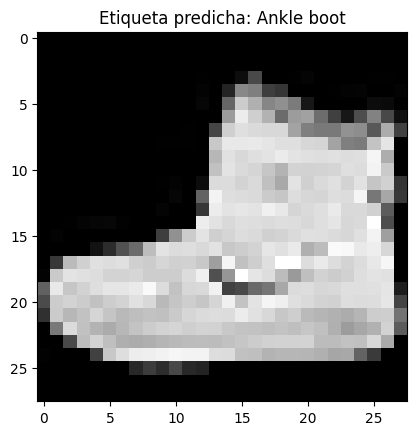

In [ ]:
# Instancia 1
plt.imshow(x_train[0], cmap='gray')
# Utilizaremos el nombre de la clase predicha como titulo
plt.title('Etiqueta predicha: ' + str(class_name))
plt.show()

# Experimentación

Tomando como base el modelo de red neuronal establecido anteriormente, vamos a experimentar para evaluar el comportamiento de la red ante diversas modificaciones.

## Cambiando Neuronas

### 512 Neuronas

In [ ]:
from keras.engine.training import optimizer
from tensorflow import keras
from tensorflow.keras import layers

# Modelo con 512 neuronas en la capa oculta
model_2 = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(512, activation = 'sigmoid'),
    keras.layers.Dense(10, activation = 'softmax')
])

# Compilando el modelo
model_2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

#Entrenamiento modelo 512 neuronas
scores_2 = model_2.fit(x_train, y_train, epochs=10, batch_size=64, verbose = 0,
                       validation_data=(x_test,y_test))

# Haciendo la evaluacion del modelo en el conjunto de prueba
test_loss_2, test_acc_2 = model_2.evaluate(x_test,y_test, verbose=0 )

#Imprimir la presicion y la perdida en el conjunto de prueba
print('Acurracy en el conjunto de prueba:',test_acc_2)
print('Perdida en el conjunto de prueba:',test_loss_2)
print('')

# Predicciones
class_2 = model_2.predict(x_test,verbose=0)
print('Primera entrada en las clasificaciones:', class_2[0])
print('')

# Clase primera entrada
first_class_2 = np.argmax(class_2[0])
print('Clase de la primera entrada:',first_class_2)

Acurracy en el conjunto de prueba: 0.8813999891281128
Perdida en el conjunto de prueba: 0.33470797538757324

Primera entrada en las clasificaciones: [1.5838870e-06 3.4052977e-08 5.6931145e-07 9.1403837e-07 2.6329592e-06
 2.9627440e-02 1.0217965e-05 1.0522732e-02 2.3148343e-05 9.5981079e-01]

Clase de la primera entrada: 9


### 1024 Neuronas

In [ ]:
from keras.engine.training import optimizer
from tensorflow import keras
from tensorflow.keras import layers

# Modelo con 1024 neuronas en la capa oculta
model_1024 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(1024, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

# Compilando el modelo
model_1024.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


#Entrenamiento modelo 512 neuronas
model_1024.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

# Haciendo la evaluacion del modelo en el conjunto de prueba
test_loss_3, test_acc_3 = model_1024.evaluate(x_test,y_test, verbose=0 )


#Imprimir la presicion y la perdida en el conjunto de prueba
print('Acurracy en el conjunto de prueba:',test_acc_2)
print('Perdida en el conjunto de prueba:',test_loss_2)

# Predicciones
class_3 = model_1024.predict(x_test,verbose=0)
print('Primera entrada en las clasificaciones:', class_3[0])
print('')
first_class_3 = np.argmax(class_2[0])
print('Clase de la primera entrada:',first_class_3)

Epoch 1/10
938/938 [==============================] - 13s 14ms/step - loss: 0.5273 - accuracy: 0.8107 - val_loss: 0.4670 - val_accuracy: 0.8263
Epoch 2/10
938/938 [==============================] - 13s 13ms/step - loss: 0.4069 - accuracy: 0.8524 - val_loss: 0.4299 - val_accuracy: 0.8415
Epoch 3/10
938/938 [==============================] - 13s 14ms/step - loss: 0.3640 - accuracy: 0.8677 - val_loss: 0.3961 - val_accuracy: 0.8592
Epoch 4/10
938/938 [==============================] - 12s 13ms/step - loss: 0.3380 - accuracy: 0.8761 - val_loss: 0.3969 - val_accuracy: 0.8594
Epoch 5/10
938/938 [==============================] - 12s 13ms/step - loss: 0.3133 - accuracy: 0.8841 - val_loss: 0.3500 - val_accuracy: 0.8761
Epoch 6/10
938/938 [==============================] - 21s 22ms/step - loss: 0.2909 - accuracy: 0.8930 - val_loss: 0.3653 - val_accuracy: 0.8688
Epoch 7/10
938/938 [==============================] - 13s 14ms/step - loss: 0.2794 - accuracy: 0.8963 - val_loss: 0.3367 - val_accuracy:

## Número de capas ocultas

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model_2 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='sigmoid'),
    Dense(128, activation='sigmoid'),
    Dense(10, activation='softmax')
])

model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_2.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1)

classifications_2 = model_2.predict(x_test)
print(classifications_2[0])

Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 0.6609 - accuracy: 0.7779
Epoch 2/10
938/938 [==============================] - 3s 4ms/step - loss: 0.4019 - accuracy: 0.8533
Epoch 3/10
938/938 [==============================] - 4s 5ms/step - loss: 0.3629 - accuracy: 0.8675
Epoch 4/10
938/938 [==============================] - 3s 4ms/step - loss: 0.3376 - accuracy: 0.8783
Epoch 5/10
938/938 [==============================] - 3s 4ms/step - loss: 0.3201 - accuracy: 0.8830
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3039 - accuracy: 0.8886
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2931 - accuracy: 0.8926
Epoch 8/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2813 - accuracy: 0.8973
Epoch 9/10
938/938 [==============================] - 4s 5ms/step - loss: 0.2701 - accuracy: 0.9004
Epoch 10/10
313/313 [==============================] - 1s 1ms/step
[8.1656952e-05 1.6973216e-05 3.21

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model_3 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='sigmoid'),
    Dense(128, activation='sigmoid'),
    Dense(128, activation='sigmoid'),
    Dense(10, activation='softmax')
])

model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_3.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1)

classifications_3 = model_3.predict(x_test)
print(classifications_3[0])

Epoch 1/10
938/938 [==============================] - 5s 5ms/step - loss: 0.7802 - accuracy: 0.7198
Epoch 2/10
938/938 [==============================] - 4s 5ms/step - loss: 0.4211 - accuracy: 0.8485
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3672 - accuracy: 0.8670
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3423 - accuracy: 0.8755
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3237 - accuracy: 0.8811
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3064 - accuracy: 0.8874
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2941 - accuracy: 0.8918
Epoch 8/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2842 - accuracy: 0.8966
Epoch 9/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2744 - accuracy: 0.8986
Epoch 10/10
313/313 [==============================] - 1s 2ms/step
[9.4526587e-07 3.5125074e-06 1.73

##Aumento de epoch

###Entrenamiento con 15 epochs

In [ ]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation = 'sigmoid'),
    keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=15, batch_size=64)

classifications = model.predict(x_test)
print(classifications[0])

Epoch 1/15
938/938 [==============================] - 6s 5ms/step - loss: 0.5956 - accuracy: 0.8030
Epoch 2/15
938/938 [==============================] - 3s 3ms/step - loss: 0.4101 - accuracy: 0.8537
Epoch 3/15
938/938 [==============================] - 3s 3ms/step - loss: 0.3726 - accuracy: 0.8658
Epoch 4/15
938/938 [==============================] - 4s 4ms/step - loss: 0.3490 - accuracy: 0.8736
Epoch 5/15
938/938 [==============================] - 3s 3ms/step - loss: 0.3314 - accuracy: 0.8803
Epoch 6/15
938/938 [==============================] - 3s 3ms/step - loss: 0.3161 - accuracy: 0.8851
Epoch 7/15
938/938 [==============================] - 3s 3ms/step - loss: 0.3011 - accuracy: 0.8906
Epoch 8/15
938/938 [==============================] - 4s 4ms/step - loss: 0.2911 - accuracy: 0.8942
Epoch 9/15
938/938 [==============================] - 3s 3ms/step - loss: 0.2812 - accuracy: 0.8974
Epoch 10/15
938/938 [==============================] - 3s 3ms/step - loss: 0.2719 - accuracy: 0.9006

###Entrenamiento con 30 epochs

In [ ]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation = 'sigmoid'),
    keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=30, batch_size=64)

classifications = model.predict(x_test)
print(classifications[0])

Epoch 1/30
938/938 [==============================] - 4s 4ms/step - loss: 0.5999 - accuracy: 0.8012
Epoch 2/30
938/938 [==============================] - 3s 3ms/step - loss: 0.4113 - accuracy: 0.8534
Epoch 3/30
938/938 [==============================] - 3s 3ms/step - loss: 0.3737 - accuracy: 0.8673
Epoch 4/30
938/938 [==============================] - 3s 3ms/step - loss: 0.3489 - accuracy: 0.8735
Epoch 5/30
938/938 [==============================] - 4s 4ms/step - loss: 0.3315 - accuracy: 0.8796
Epoch 6/30
938/938 [==============================] - 3s 4ms/step - loss: 0.3157 - accuracy: 0.8860
Epoch 7/30
938/938 [==============================] - 3s 3ms/step - loss: 0.3039 - accuracy: 0.8900
Epoch 8/30
938/938 [==============================] - 3s 3ms/step - loss: 0.2921 - accuracy: 0.8941
Epoch 9/30
938/938 [==============================] - 4s 4ms/step - loss: 0.2817 - accuracy: 0.8968
Epoch 10/30
938/938 [==============================] - 3s 4ms/step - loss: 0.2749 - accuracy: 0.8991

##Early stopping

In [ ]:
from tensorflow import keras
from tensorflow.keras import callbacks

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=4,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation = 'sigmoid'),
    keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=64,callbacks=[early_stopping])

classifications = model.predict(x_test)
print(classifications[0])

Epoch 1/10
937/938 [============================>.] - ETA: 0s - loss: 0.5964 - accuracy: 0.8001

938/938 [==============================] - 4s 3ms/step - loss: 0.5963 - accuracy: 0.8001
Epoch 2/10
937/938 [============================>.] - ETA: 0s - loss: 0.4140 - accuracy: 0.8526

938/938 [==============================] - 3s 3ms/step - loss: 0.4140 - accuracy: 0.8526
Epoch 3/10
930/938 [============================>.] - ETA: 0s - loss: 0.3728 - accuracy: 0.8654

938/938 [==============================] - 3s 4ms/step - loss: 0.3733 - accuracy: 0.8652
Epoch 4/10
928/938 [============================>.] - ETA: 0s - loss: 0.3490 - accuracy: 0.8742

938/938 [==============================] - 4s 4ms/step - loss: 0.3492 - accuracy: 0.8741
Epoch 5/10
928/938 [============================>.] - ETA: 0s - loss: 0.3298 - accuracy: 0.8803

938/938 [==============================] - 3s 3ms/step - loss: 0.3302 - accuracy: 0.8801
Epoch 6/10
938/938 [==============================] - ETA: 0s - loss: 0.3159 - accuracy: 0.8849

938/938 [==============================] - 3s 3ms/step - loss: 0.3159 - accuracy: 0.8849
Epoch 7/10
932/938 [============================>.] - ETA: 0s - loss: 0.3023 - accuracy: 0.8902

938/938 [==============================] - 4s 4ms/step - loss: 0.3022 - accuracy: 0.8903
Epoch 8/10
927/938 [============================>.] - ETA: 0s - loss: 0.2909 - accuracy: 0.8949

938/938 [==============================] - 4s 4ms/step - loss: 0.2905 - accuracy: 0.8948
Epoch 9/10
927/938 [============================>.] - ETA: 0s - loss: 0.2808 - accuracy: 0.8978

938/938 [==============================] - 3s 3ms/step - loss: 0.2811 - accuracy: 0.8976
Epoch 10/10
932/938 [============================>.] - ETA: 0s - loss: 0.2724 - accuracy: 0.9002

313/313 [==============================] - 1s 1ms/step
[1.7242843e-05 7.5073621e-07 1.0458074e-05 2.4173357e-06 1.2981219e-05
 2.3955032e-02 2.7204313e-05 5.4131724e-02 7.1892579e-04 9.2112327e-01]


##Unidades de activación

Vamos a comprar las unidades "ReLu" y "Sigmoid" utilizando 4 capas 

###Sigmoid

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model_4A = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='sigmoid'),
    Dense(128, activation='sigmoid'),
    Dense(128, activation='sigmoid'),
    Dense(128, activation='sigmoid'),
    Dense(10, activation='softmax')
])

model_4A.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_4A.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1)

classifications_4A = model_4A.predict(x_test)
print(classifications_4A[0])

Epoch 1/10
938/938 [==============================] - 6s 6ms/step - loss: 0.9018 - accuracy: 0.6538
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.4864 - accuracy: 0.8153
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.4164 - accuracy: 0.8520
Epoch 4/10
938/938 [==============================] - 4s 5ms/step - loss: 0.3733 - accuracy: 0.8666
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3488 - accuracy: 0.8748
Epoch 6/10
938/938 [==============================] - 5s 6ms/step - loss: 0.3269 - accuracy: 0.8817
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3113 - accuracy: 0.8869
Epoch 8/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2994 - accuracy: 0.8905
Epoch 9/10
938/938 [==============================] - 6s 6ms/step - loss: 0.2902 - accuracy: 0.8941
Epoch 10/10
313/313 [==============================] - 1s 2ms/step
[2.6677461e-07 4.2976048e-05 9.89

###ReLu

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model_4B = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_4B.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_4B.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1)

classifications_4B = model_4B.predict(x_test)
print(classifications_4B[0])

Epoch 1/10
938/938 [==============================] - 6s 6ms/step - loss: 0.5116 - accuracy: 0.8166
Epoch 2/10
938/938 [==============================] - 4s 5ms/step - loss: 0.3677 - accuracy: 0.8647
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3317 - accuracy: 0.8757
Epoch 4/10
938/938 [==============================] - 5s 6ms/step - loss: 0.3109 - accuracy: 0.8842
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2947 - accuracy: 0.8907
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2768 - accuracy: 0.8957
Epoch 7/10
938/938 [==============================] - 5s 6ms/step - loss: 0.2688 - accuracy: 0.8986
Epoch 8/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2546 - accuracy: 0.9036
Epoch 9/10
938/938 [==============================] - 4s 5ms/step - loss: 0.2469 - accuracy: 0.9071
Epoch 10/10
313/313 [==============================] - 1s 2ms/step
[4.01496635e-07 7.41591464e-08 1.

Una de las ventajas de la función sigmoid es que tiene una derivada simple y se puede usar fácilmente para retropropagación. Pero como desventaja, la función sigmoid puede generar problemas de desvanecimiento del gradiente y ser muy lenta en la convergencia debido a su forma suave y saturación de los valores de entrada.

Una de las ventajas de la función ReLU es que es computacionalmente eficiente y tiene una derivada simple. ReLU no sufre de saturación y es menos probable que cause el problema de desvanecimiento del gradiente. Como resultado, la función ReLU generalmente converge más rápido que la función sigmoid.

Finalmente, la unidad de activación ReLU es generalmente mejor que la función sigmoid en términos de velocidad de convergencia y precisión en tareas de aprendizaje profundo, debido a su simplicidad y capacidad para evitar problemas de saturación y desvanecimiento del gradiente. Sin embargo, la elección de la función de activación depende de la tarea y la arquitectura de la red neuronal.

##Inicialización de parámetros

###Inicialización con ceros

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.initializers import Constant

initializer = Constant(value=0.1)

model_5 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, kernel_initializer=initializer,activation='relu'),
    Dense(128, kernel_initializer=initializer,activation='relu'),
    Dense(128, kernel_initializer=initializer,activation='relu'),
    Dense(128, kernel_initializer=initializer,activation='relu'),
    Dense(10, kernel_initializer=initializer,activation='softmax')
])

model_5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_5.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1)

classifications_5 = model_5.predict(x_test)
print(classifications_5[0])

Epoch 1/10
938/938 [==============================] - 5s 4ms/step - loss: 199.4845 - accuracy: 0.1018
Epoch 2/10
938/938 [==============================] - 5s 6ms/step - loss: 2.7824 - accuracy: 0.1145
Epoch 3/10
938/938 [==============================] - 4s 5ms/step - loss: 2.4591 - accuracy: 0.1400
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 2.2703 - accuracy: 0.1741
Epoch 5/10
938/938 [==============================] - 5s 6ms/step - loss: 2.1355 - accuracy: 0.1951
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 1.9467 - accuracy: 0.2227
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 1.7486 - accuracy: 0.2851
Epoch 8/10
938/938 [==============================] - 5s 5ms/step - loss: 1.6444 - accuracy: 0.3280
Epoch 9/10
938/938 [==============================] - 4s 4ms/step - loss: 1.5814 - accuracy: 0.3613
Epoch 10/10
313/313 [==============================] - 1s 2ms/step
[0.01636745 0.15633431 0.006270

###Inicialización con una variable aleatoria normal

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.initializers import RandomNormal

initializer_2 = RandomNormal(mean=0,stddev=0.1)

model_6 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, kernel_initializer=initializer_2,activation='relu'),
    Dense(128, kernel_initializer=initializer_2,activation='relu'),
    Dense(128, kernel_initializer=initializer_2,activation='relu'),
    Dense(128, kernel_initializer=initializer_2,activation='relu'),
    Dense(10, kernel_initializer=initializer_2,activation='softmax')
])

model_6.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_6.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1)

classifications_6 = model_6.predict(x_test)
print(classifications_6[0])

/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/10
938/938 [==============================] - 6s 6ms/step - loss: 0.5027 - accuracy: 0.8192
Epoch 2/10
938/938 [==============================] - 5s 6ms/step - loss: 0.3636 - accuracy: 0.8658
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3306 - accuracy: 0.8775
Epoch 4/10
938/938 [==============================] - 4s 5ms/step - loss: 0.3053 - accuracy: 0.8870
Epoch 5/10
938/938 [==============================] - 5s 6ms/step - loss: 0.2925 - accuracy: 0.8907
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2774 - accuracy: 0.8962
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2640 - accuracy: 0.9006
Epoch 8/10
938/938 [==============================] - 5s 6ms/step - loss: 0.2519 - accuracy: 0.9048
Epoch 9/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2437 - accuracy: 0.9068
Epoch 10/10
313/313 [==============================] - 1s 2ms/step
[4.2465069e-07 1.0704533e-07 4.71

###Inicialización con los valores por defecto de Keras para una capa Dense (estrategia Glorot uniform)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.initializers import GlorotUniform

initializer_3 = GlorotUniform(seed=0)

model_7 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, kernel_initializer=initializer_3,activation='relu'),
    Dense(128, kernel_initializer=initializer_3,activation='relu'),
    Dense(128, kernel_initializer=initializer_3,activation='relu'),
    Dense(128, kernel_initializer=initializer_3,activation='relu'),
    Dense(10, kernel_initializer=initializer_3,activation='softmax')
])

model_7.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_7.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1)

classifications_7 = model_7.predict(x_test)
print(classifications_7[0])

Epoch 1/10
938/938 [==============================] - 5s 4ms/step - loss: 0.5148 - accuracy: 0.8130
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3713 - accuracy: 0.8647
Epoch 3/10
938/938 [==============================] - 5s 6ms/step - loss: 0.3322 - accuracy: 0.8763
Epoch 4/10
938/938 [==============================] - 4s 5ms/step - loss: 0.3090 - accuracy: 0.8856
Epoch 5/10
938/938 [==============================] - 4s 5ms/step - loss: 0.2942 - accuracy: 0.8895
Epoch 6/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2797 - accuracy: 0.8953
Epoch 7/10
938/938 [==============================] - 4s 5ms/step - loss: 0.2660 - accuracy: 0.8992
Epoch 8/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2560 - accuracy: 0.9037
Epoch 9/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2478 - accuracy: 0.9068
Epoch 10/10
313/313 [==============================] - 1s 2ms/step
[3.4947521e-07 7.6959333e-07 8.15

La principal diferencia entre los initializers Constant, RandomNormal y GlorotUniform radica en cómo inicializan los pesos de una red neuronal. El initializer Constant establece un valor constante para todos los pesos, mientras que los initializers RandomNormal y GlorotUniform inicializan los pesos con valores aleatorios de una distribución normal y uniforme, respectivamente. El initializer GlorotUniform está diseñado para mantener la varianza de las entradas y salidas de una capa similar, lo que puede ser útil para prevenir problemas durante el entrenamiento.

Y como se puede ver, el GlorotUniform es el mejor iniciador de los tres.

##Optimizadores

Antes de comparar y analizar las diferencias que se observan al entrenar con varios optimizadores, la mejor estrategia de inicialización observada fue con los valores por defecto de Keras para una capa Dense (estrategia Glorot uniform), es por esto que seleccionamos este inicializador.

Elegimos 3 optimizadores para comprarlos:



*   Optimizer Adam
*   Optimizer RMSprop
*   Optimizer SGD

###Optimizer Adam

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras.optimizers import Adam

initializer_4A = GlorotUniform(seed=0)

optimizer_8A = Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name='Adam'
)

model_8A = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, kernel_initializer=initializer_4A,activation='relu'),
    Dense(128, kernel_initializer=initializer_4A,activation='relu'),
    Dense(128, kernel_initializer=initializer_4A,activation='relu'),
    Dense(128, kernel_initializer=initializer_4A,activation='relu'),
    Dense(10, kernel_initializer=initializer_4A,activation='softmax')
])

model_8A.compile(optimizer=optimizer_8A, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_8A.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1)

classifications_8A = model_8A.predict(x_test)
print(classifications_8A[0])

Epoch 1/10
938/938 [==============================] - 6s 6ms/step - loss: 0.5104 - accuracy: 0.8173
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3682 - accuracy: 0.8663
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3375 - accuracy: 0.8760
Epoch 4/10
938/938 [==============================] - 7s 7ms/step - loss: 0.3100 - accuracy: 0.8841
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2940 - accuracy: 0.8907
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2812 - accuracy: 0.8957
Epoch 7/10
938/938 [==============================] - 5s 6ms/step - loss: 0.2699 - accuracy: 0.8990
Epoch 8/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2577 - accuracy: 0.9030
Epoch 9/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2460 - accuracy: 0.9072
Epoch 10/10
313/313 [==============================] - 1s 2ms/step
[9.2890532e-06 2.5126518e-04 4.01

###RMSprop

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras.optimizers.experimental import RMSprop

initializer_4B = GlorotUniform(seed=0)

optimizer_8B = RMSprop(
    learning_rate=0.001,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=100,
    jit_compile=True,
    name='RMSprop'
)

model_8B = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, kernel_initializer=initializer_4B,activation='relu'),
    Dense(128, kernel_initializer=initializer_4B,activation='relu'),
    Dense(128, kernel_initializer=initializer_4B,activation='relu'),
    Dense(128, kernel_initializer=initializer_4B,activation='relu'),
    Dense(10, kernel_initializer=initializer_4B,activation='softmax')
])

model_8B.compile(optimizer=optimizer_8B, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_8B.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1)

classifications_8B = model_8B.predict(x_test)
print(classifications_8B[0])

Epoch 1/10
938/938 [==============================] - 5s 4ms/step - loss: 0.5425 - accuracy: 0.7991
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3860 - accuracy: 0.8590
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3495 - accuracy: 0.8727
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3275 - accuracy: 0.8791
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3133 - accuracy: 0.8850
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3021 - accuracy: 0.8881
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2943 - accuracy: 0.8921
Epoch 8/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2915 - accuracy: 0.8947
Epoch 9/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2903 - accuracy: 0.8960
Epoch 10/10
313/313 [==============================] - 1s 2ms/step
[2.1830510e-06 7.7631514e-05 1.62

###SGD

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras.optimizers.experimental import SGD

initializer_4C = GlorotUniform(seed=0)

optimizer_8C = SGD(
    learning_rate=0.01,
    momentum=0.0,
    nesterov=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name='SGD'
)

model_8C = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, kernel_initializer=initializer_4C,activation='relu'),
    Dense(128, kernel_initializer=initializer_4C,activation='relu'),
    Dense(128, kernel_initializer=initializer_4C,activation='relu'),
    Dense(128, kernel_initializer=initializer_4C,activation='relu'),
    Dense(10, kernel_initializer=initializer_4C,activation='softmax')
])

model_8C.compile(optimizer=optimizer_8C, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_8C.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1)

classifications_8C = model_8C.predict(x_test)
print(classifications_8C[0])

Epoch 1/10
938/938 [==============================] - 5s 4ms/step - loss: 0.9885 - accuracy: 0.6670
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.5560 - accuracy: 0.8050
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.4862 - accuracy: 0.8299
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.4509 - accuracy: 0.8427
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.4285 - accuracy: 0.8495
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.4090 - accuracy: 0.8553
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3931 - accuracy: 0.8601
Epoch 8/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3815 - accuracy: 0.8648
Epoch 9/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3687 - accuracy: 0.8684
Epoch 10/10
313/313 [==============================] - 1s 2ms/step
[2.5121167e-06 5.0702158e-05 5.30

El optimizador SGD es un optimizador que ajusta los pesos de la red neuronal utilizando el gradiente de la función de pérdida. Es rápido y fácil de implementar, pero necesita ajustes cuidadosos de la tasa de aprendizaje para obtener un buen rendimiento. Es por esto que de los tres fue el que peor o el que menos se ajusto con nuestro fin de mejora.

El optimizador RMSprop es un optimizador que utiliza el promedio móvil de los cuadrados de los gradientes para adaptar la tasa de aprendizaje en cada peso. Tiene la capacidad de ajustar automáticamente la tasa de aprendizaje en función de la varianza de los gradientes y por ende, fue más efectivo que SGD.

El optimizador Adam es una combinación de RMSprop y SGD, lo que lo hace adecuado para una amplia variedad de situaciones de entrenamiento. Adam también puede ser más efectivo que SGD y RMSprop en situaciones donde los gradientes son ruidosos o cuando la tasa de aprendizaje necesita ser ajustada dinámicamente. 

Finalmente se concluye que para este proyecto, Adam, al ser una especie de combinación de los otros 2 modelos, fue más efectivo.

## Regularización y red final


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras.optimizers.experimental import SGD
import pandas as pd

# Inicilizacion de los parametros
initializer = keras.initializers.GlorotUniform()

# Red Neuronal
red_final = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(1024, activation='sigmoid', kernel_initializer=initializer),
    keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

# Optimizador
adam_optimizer = tf.keras.optimizers.Adam()

# Modelo compilado
red_final.compile(optimizer=adam_optimizer,
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early Stopping Callback
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Entrenamineto
red_final_history = red_final.fit(x_train, y_train, epochs=15,
                                  batch_size=64, verbose=0,
                                  validation_data=(x_test, y_test),
                                  callbacks=[early_stop])

# Evaluacion
red_final_loss, red_final_accuracy = red_final.evaluate(x_test, y_test,
                                                        verbose=0)
# Precision y perdida
print('La precision de la prueba:', red_final_accuracy*100)
print('La perdida de la prueba:', red_final_loss*100)


/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


La precision de la prueba: 88.9299988746643
La perdida de la prueba: 32.071712613105774


## Conclusion

Basándonos en los resultados proporcionados, podemos concluir lo siguiente:

La precisión del modelo de clasificación de imágenes es del 88.93%, lo que indica que el modelo clasifica correctamente casi el 89% de las imágenes de prueba.

La pérdida del modelo de clasificación de imágenes es de 32.07, lo que significa que el modelo tiene dificultades para predecir correctamente algunas imágenes de prueba. Idealmente, la pérdida debería ser lo más baja posible para indicar que el modelo está haciendo predicciones precisas.

En resumen, el modelo de clasificación de imágenes tiene una precisión bastante alta, pero aún hay margen de mejora en términos de reducir la pérdida. Esto podría lograrse mediante la mejora de la arquitectura del modelo, la optimización de los parámetros de entrenamiento o el aumento del conjunto de datos de entrenamiento.